In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Importing datasets

In [3]:
df_gcn = pd.read_csv('wandb_export_GCN_sweep.csv')
df_gat = pd.read_csv('wandb_export_GAT_sweep.csv')

In [4]:
df_gat

,Name,dropout,weight_decay,learning_rate,n_conv_layers,similarity,layer_sizes,_wandb,final_validation_r_fold_2,final_validation_mse_fold_1,...,validation_mse_fold_3,final_validation_mse_fold_2,final_validation_r_fold_3,train_r2_fold_1,final_validation_r_fold_1,validation_r2_fold_1,train_mse_fold_3,train_r_fold_2,validation_r2_fold_0,validation_mse_fold_0
0,summer-sweep-29-fold-4,0.003142,0.000605,0.013365,2,"(['SEX', 'ICD10', 'MEM', 'FI'], 0.8)","[2048, 1024, 512, 256, 128, 1]",NaN,"[0.7258302086136431,0]",27.894621,...,46.040649,26.564274,"[0.7226826311447551,0]",0.906181,"[0.7151358222732984,0]",0.419463,17.632347,0.925308,0.394347,33.804966
1,different-sweep-7-fold-4,0.306806,0.002071,0.001679,2,"(['SEX', 'ICD10', 'FI', 'FTE', 'MEM'], 0.9)","[1024, 512, 256, 128, 128, 1]",NaN,"[0.7156418650372596,0]",28.209438,...,43.203728,27.073273,"[0.711002296599681,0]",0.656101,"[0.707635441119485,0]",0.151917,17.190908,0.867931,0.191953,45.101715
2,bumbling-sweep-16-fold-4,0.104624,0.036676,0.003412,3,"(['SEX', 'ICD10', 'MEM', 'FI'], 0.8)","[1024, 512, 256, 128, 128, 1]",NaN,"[0.7026725092682169,0]",28.189878,...,40.065670,27.997885,"[0.7060242905665377,0]",0.672837,"[0.7083545548468768,0]",0.320860,21.351851,0.631846,0.297744,39.196899
3,prime-sweep-6-fold-4,0.327091,0.001549,0.002482,2,"(['SEX', 'ICD10', 'FI', 'FTE', 'MEM'], 0.9)","[512, 512, 512, 256, 128, 1]",NaN,"[0.707052692540311,0]",27.988211,...,45.506577,28.210487,"[0.7136404086576125,0]",0.635158,"[0.7104423977985255,0]",0.140557,19.590685,0.843027,0.172198,46.204323
4,fluent-sweep-26-fold-4,0.407471,0.006715,0.003246,3,"(['SEX', 'ICD10', 'FI', 'FTE', 'MEM'], 0.9)","[1024, 512, 256, 128, 128, 1]",NaN,"[0.6984818264686528,0]",29.519991,...,54.055073,28.346188,"[0.7082807553289461,0]",0.368334,"[0.692207055459365,0]",0.012113,28.716328,0.760176,0.081998,51.238895
5,blooming-sweep-24-fold-4,0.323481,0.002475,0.001462,3,"(['SEX', 'ICD10', 'FI', 'FTE', 'MEM'], 0.9)","[1024, 512, 256, 128, 128, 1]",NaN,"[0.688560591163895,0]",29.394712,...,43.903870,29.461382,"[0.7104433697945123,0]",0.683830,"[0.7026058182322128,0]",0.202336,17.737488,0.866825,0.201435,44.572445
6,copper-sweep-9-fold-4,0.291117,0.000844,0.006769,2,"(['SEX', 'ICD10', 'FI', 'FTE', 'MEM'], 0.9)","[1024, 512, 256, 128, 128, 1]",NaN,"[0.7036632881174956,0]",29.888153,...,42.312069,28.186001,"[0.7003382520971198,0]",0.586584,"[0.6900236936358236,0]",-0.074891,15.491842,0.877735,0.207691,44.223293
7,stellar-sweep-27-fold-4,0.455777,0.001483,0.006813,3,"(['SEX', 'ICD10', 'MEM', 'FI'], 0.8)","[1024, 512, 256, 128, 128, 1]",NaN,"[0.7054875408691097,0]",30.156441,...,53.730858,27.823391,"[0.7079052588148158,0]",0.424767,"[0.6824408168541461,0]",0.017297,31.105707,0.797036,-0.030941,57.542709
8,sunny-sweep-23-fold-4,0.381829,0.003226,0.003820,3,"(['SEX', 'ICD10', 'MEM', 'FI'], 0.8)","[512, 512, 512, 256, 128, 1]",NaN,"[0.6974699199124839,0]",30.256987,...,52.105892,28.535599,"[0.7055612875345418,0]",0.502560,"[0.6974670986958343,0]",-0.063310,26.111219,0.816621,0.038749,53.652882
9,blooming-sweep-3-fold-4,0.467696,0.000705,0.002564,3,"(['SEX', 'ICD10', 'MEM', 'FTE'], 0.8)","[1024, 512, 512, 256, 256, 128, 128, 1]",NaN,"[0.6958516326955956,0]",28.729443,...,57.924721,28.868114,"[0.6993797693338168,0]",0.418167,"[0.6999175046820045,0]",-0.018657,32.773331,0.797660,-0.078212,60.181175


# GCN models

In [5]:
# Find the standard deviation over folds
df_gcn['cv_mse_mean'] = df_gcn['cv_validation_average_mse']
df_gcn['cv_mse_std'] = df_gcn[['final_validation_mse_fold_{}'.format(i) for i in range(5)]].std(axis=1)

In [6]:
df_gcn.loc[11, ['cv_mse_mean', 'cv_mse_std']]

cv_mse_mean     30.0235
cv_mse_std     0.767439
Name: 11, dtype: object

In [7]:
min_loss_idx = df_gcn['cv_mse_mean'].argmin()
min_loss_high_error = df_gcn.loc[min_loss_idx, 'cv_mse_mean'] + df_gcn.loc[min_loss_idx, 'cv_mse_std']

/Users/kamilestankeviciute/anaconda3/envs/datasci/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  """Entry point for launching an IPython kernel.


In [8]:
df_gcn[df_gcn['cv_mse_mean'] - df_gcn['cv_mse_std'] <= min_loss_high_error][['Name', 'cv_mse_mean', 'cv_mse_std']]

,Name,cv_mse_mean,cv_mse_std
0,summer-sweep-50-fold-4,28.045074,0.594661
1,flowing-sweep-61-fold-4,28.372438,0.337489
2,electric-sweep-30-fold-4,28.523596,0.299467
3,youthful-sweep-77-fold-4,28.853450,1.017336
4,scarlet-sweep-74-fold-4,28.875277,0.469869
5,young-sweep-17-fold-4,29.020517,0.806356
8,dainty-sweep-46-fold-4,29.491114,0.883251


In [9]:
df_gcn_filtered = df_gcn[df_gcn['cv_mse_mean'] - df_gcn['cv_mse_std'] <= min_loss_high_error].copy()
df_gcn_filtered['id'] = df_gcn_filtered.index
df_gcn_filtered

,Name,learning_rate,similarity,layer_sizes,weight_decay,n_conv_layers,dropout,_wandb,validation_r2_fold_4,cv_validation_average_r,...,validation_mse_fold_0,final_validation_mse_fold_1,final_validation_r_fold_2,validation_r2_fold_2,final_validation_r_fold_3,final_validation_r2_fold_3,validation_mse_fold_3,cv_mse_mean,cv_mse_std,id
0,summer-sweep-50-fold-4,0.006984,"(['SEX', 'ICD10', 'FI', 'FTE', 'MEM'], 0.9)","[1024, 512, 512, 256, 256, 1]",0.013118,5,0.321941,NaN,0.173922,"[0.7098480072291622,0]",...,30.494959,27.811209,"[0.7138105142100741,0]",-0.278243,"[0.7012796633165099,0]",0.485083,59.785851,28.045074,0.594661,0
1,flowing-sweep-61-fold-4,0.006187,"(['SEX', 'ICD10', 'MEM', 'FTE'], 0.8)","[1024, 512, 512, 512, 256, 256, 1]",0.002084,3,0.042080,NaN,0.469902,"[0.7042792789490768,0]",...,29.820312,28.273195,"[0.7061591373231205,0]",0.463630,"[0.6991002365059049,0]",0.484734,30.856045,28.372438,0.337489,1
2,electric-sweep-30-fold-4,0.005095,"(['SEX', 'ICD10', 'MEM', 'FTE'], 0.8)","[1024, 512, 256, 128, 128, 1]",0.016171,1,0.048596,NaN,-0.190228,"[0.7007915945877421,0]",...,35.732410,28.188738,"[0.6932982696393085,0]",0.421974,"[0.6958425474989822,0]",0.483287,35.696411,28.523596,0.299467,2
3,youthful-sweep-77-fold-4,0.004731,"(['SEX', 'ICD10', 'MEM', 'FI'], 0.8)","[512, 512, 512, 256, 128, 1]",0.002517,2,0.237940,NaN,0.218647,"[0.7000994553788613,0]",...,43.174793,29.800779,"[0.7122666151406618,0]",0.189757,"[0.7020432043822225,0]",0.483986,41.209572,28.853450,1.017336,3
4,scarlet-sweep-74-fold-4,0.015796,"(['SEX', 'ICD10', 'MEM', 'FI'], 0.8)","[1024, 512, 256, 128, 128, 1]",0.003114,5,0.375442,NaN,0.436346,"[0.6989406541235141,0]",...,42.530941,29.236734,"[0.6994393921097604,0]",0.084196,"[0.7002392838990377,0]",0.486976,38.643169,28.875277,0.469869,4
5,young-sweep-17-fold-4,0.010273,"(['SEX', 'ICD10', 'MEM', 'FI'], 0.8)","[1024, 512, 256, 128, 128, 1]",0.005341,3,0.386998,NaN,0.140256,"[0.6958769303528729,0]",...,73.341690,29.762712,"[0.7063747770259314,0]",-0.011080,"[0.6951879801581095,0]",0.475877,58.371243,29.020517,0.806356,5
8,dainty-sweep-46-fold-4,0.003504,"(['SEX', 'ICD10', 'MEM', 'FI'], 0.8)","[2048, 1024, 512, 256, 128, 1]",0.018943,4,0.426491,NaN,0.033488,"[0.6895172047484973,0]",...,55.872749,30.430195,"[0.6894907591380667,0]",0.035095,"[0.6793212556379227,0]",0.455412,58.073753,29.491114,0.883251,8


In [10]:
folds = ['final_validation_mse_fold_{}'.format(i) for i in range(5)]
df_gcn_filtered_melted = pd.melt(df_gcn_filtered, id_vars=['id'], value_vars=folds)

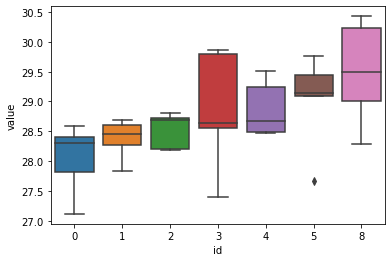

In [11]:
fig, ax = plt.subplots()
# fig.set_size_inches(11.7, 8.27)

ax = sns.boxplot(x="id", y="value", data=df_gcn_filtered_melted, ax=ax)

# GAT models

In [12]:
# Find the standard deviation over folds
df_gat['cv_mse_mean'] = df_gat['cv_validation_average_mse']
df_gat['cv_mse_std'] = df_gat[['final_validation_mse_fold_{}'.format(i) for i in range(5)]].std(axis=1)

In [13]:
gat_min_loss_idx = df_gat['cv_mse_mean'].argmin()
gat_min_loss_high_error = df_gat.loc[gat_min_loss_idx, 'cv_mse_mean'] + df_gat.loc[gat_min_loss_idx, 'cv_mse_std']

/Users/kamilestankeviciute/anaconda3/envs/datasci/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  """Entry point for launching an IPython kernel.


In [14]:
df_gat[df_gat['cv_mse_mean'] - df_gat['cv_mse_std'] <= gat_min_loss_high_error][['Name', 'cv_mse_mean', 'cv_mse_std']]

,Name,cv_mse_mean,cv_mse_std
0,summer-sweep-29-fold-4,27.543018,0.757831
1,different-sweep-7-fold-4,28.107559,0.787149
2,bumbling-sweep-16-fold-4,28.207404,0.182981
3,prime-sweep-6-fold-4,28.425118,0.458002
4,fluent-sweep-26-fold-4,28.561369,0.760319
5,blooming-sweep-24-fold-4,28.822765,0.694876
6,copper-sweep-9-fold-4,28.848512,0.900478
7,stellar-sweep-27-fold-4,28.859661,0.941607
8,sunny-sweep-23-fold-4,28.981194,0.739823


In [15]:
df_gat_filtered = df_gat[df_gat['cv_mse_mean'] - df_gat['cv_mse_std'] <= gat_min_loss_high_error].copy()
df_gat_filtered['id'] = df_gat_filtered.index
df_gat_filtered

,Name,dropout,weight_decay,learning_rate,n_conv_layers,similarity,layer_sizes,_wandb,final_validation_r_fold_2,final_validation_mse_fold_1,...,train_r2_fold_1,final_validation_r_fold_1,validation_r2_fold_1,train_mse_fold_3,train_r_fold_2,validation_r2_fold_0,validation_mse_fold_0,cv_mse_mean,cv_mse_std,id
0,summer-sweep-29-fold-4,0.003142,0.000605,0.013365,2,"(['SEX', 'ICD10', 'MEM', 'FI'], 0.8)","[2048, 1024, 512, 256, 128, 1]",NaN,"[0.7258302086136431,0]",27.894621,...,0.906181,"[0.7151358222732984,0]",0.419463,17.632347,0.925308,0.394347,33.804966,27.543018,0.757831,0
1,different-sweep-7-fold-4,0.306806,0.002071,0.001679,2,"(['SEX', 'ICD10', 'FI', 'FTE', 'MEM'], 0.9)","[1024, 512, 256, 128, 128, 1]",NaN,"[0.7156418650372596,0]",28.209438,...,0.656101,"[0.707635441119485,0]",0.151917,17.190908,0.867931,0.191953,45.101715,28.107559,0.787149,1
2,bumbling-sweep-16-fold-4,0.104624,0.036676,0.003412,3,"(['SEX', 'ICD10', 'MEM', 'FI'], 0.8)","[1024, 512, 256, 128, 128, 1]",NaN,"[0.7026725092682169,0]",28.189878,...,0.672837,"[0.7083545548468768,0]",0.320860,21.351851,0.631846,0.297744,39.196899,28.207404,0.182981,2
3,prime-sweep-6-fold-4,0.327091,0.001549,0.002482,2,"(['SEX', 'ICD10', 'FI', 'FTE', 'MEM'], 0.9)","[512, 512, 512, 256, 128, 1]",NaN,"[0.707052692540311,0]",27.988211,...,0.635158,"[0.7104423977985255,0]",0.140557,19.590685,0.843027,0.172198,46.204323,28.425118,0.458002,3
4,fluent-sweep-26-fold-4,0.407471,0.006715,0.003246,3,"(['SEX', 'ICD10', 'FI', 'FTE', 'MEM'], 0.9)","[1024, 512, 256, 128, 128, 1]",NaN,"[0.6984818264686528,0]",29.519991,...,0.368334,"[0.692207055459365,0]",0.012113,28.716328,0.760176,0.081998,51.238895,28.561369,0.760319,4
5,blooming-sweep-24-fold-4,0.323481,0.002475,0.001462,3,"(['SEX', 'ICD10', 'FI', 'FTE', 'MEM'], 0.9)","[1024, 512, 256, 128, 128, 1]",NaN,"[0.688560591163895,0]",29.394712,...,0.683830,"[0.7026058182322128,0]",0.202336,17.737488,0.866825,0.201435,44.572445,28.822765,0.694876,5
6,copper-sweep-9-fold-4,0.291117,0.000844,0.006769,2,"(['SEX', 'ICD10', 'FI', 'FTE', 'MEM'], 0.9)","[1024, 512, 256, 128, 128, 1]",NaN,"[0.7036632881174956,0]",29.888153,...,0.586584,"[0.6900236936358236,0]",-0.074891,15.491842,0.877735,0.207691,44.223293,28.848512,0.900478,6
7,stellar-sweep-27-fold-4,0.455777,0.001483,0.006813,3,"(['SEX', 'ICD10', 'MEM', 'FI'], 0.8)","[1024, 512, 256, 128, 128, 1]",NaN,"[0.7054875408691097,0]",30.156441,...,0.424767,"[0.6824408168541461,0]",0.017297,31.105707,0.797036,-0.030941,57.542709,28.859661,0.941607,7
8,sunny-sweep-23-fold-4,0.381829,0.003226,0.003820,3,"(['SEX', 'ICD10', 'MEM', 'FI'], 0.8)","[512, 512, 512, 256, 128, 1]",NaN,"[0.6974699199124839,0]",30.256987,...,0.502560,"[0.6974670986958343,0]",-0.063310,26.111219,0.816621,0.038749,53.652882,28.981194,0.739823,8


In [16]:
folds = ['final_validation_mse_fold_{}'.format(i) for i in range(5)]
df_gat_filtered_melted = pd.melt(df_gat_filtered, id_vars=['id'], value_vars=folds)

In [26]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """ Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    elif width == 'pnas':
        width_pt = 246.09686
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

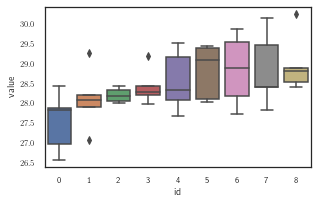

In [28]:
nice_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 10,
        "font.size": 10,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 8,
        "xtick.labelsize": 8,
        "ytick.labelsize": 8,
}
sns.set(font_scale=1.5, rc=nice_fonts)
sns.set_style("white")
width = 345
fig, ax = plt.subplots(1, 1, figsize=set_size(width))

ax = sns.boxplot(x="id", y="value", data=df_gat_filtered_melted, ax=ax)